# Part I - (Prosper Loan Data Exploration)
## by Namhla Hermans

## Introduction
>The Prosper Loan dataset contains about 110K loans borrowed from the San Francisco based company __[Prosper MarketPlace](https://www.prosper.com/)__ which specializes in providing loans at low interest rates.

> The dataset contains 81 variables for each loan entry such as:
> - LoanOriginalAmount : The original amount of the loan.
> - BorrowerRate : The borrower's interest rate for the loan.
> - LoanStatus : The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The past due status is followed by a delinquency bucket.
> - ProsperScore : A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
> ListingCategory (numeric) : The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
> - ProsperRating (numeric) : The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
> - and many more variables



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load dataset into pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv')

In [3]:
#overview of data dimension and composition
print(prosper.shape)
print(prosper.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [4]:
# Statistical description
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
prosper.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
#dropping income ranges that are not displayed
prosper.drop(prosper.index[prosper['IncomeRange']=='Not displayed'], inplace=True)

In [7]:
#dropping null values in Delinquencies
prosper.dropna(subset=['DelinquenciesLast7Years'], inplace=True)

In [8]:
# Ordering Categorial variables
ordinal_dict= {'ProsperRating (Alpha)':['HR','E','D','C','B','A','AA'],
              'IncomeRange':['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
              'LoanStatus': ['Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (61-90 days)','Past Due (31-60 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled','Chargedoff']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered= True, 
                                              categories= ordinal_dict[var])
    prosper[var] = prosper[var].astype(ordered_var)

In [9]:
# Missing data count
prosper.isnull().sum()

ListingKey                                 0
ListingNumber                              0
ListingCreationDate                        0
CreditGrade                            84984
Term                                       0
LoanStatus                                 0
ClosedDate                             58848
BorrowerAPR                                0
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                21323
EstimatedLoss                          21323
EstimatedReturn                        21323
ProsperRating (numeric)                21323
ProsperRating (Alpha)                  21323
ProsperScore                           21323
ListingCategory (numeric)                  0
BorrowerState                           1699
Occupation                              1333
EmploymentStatus                           0
EmploymentStatusDuration                  23
IsBorrowerHomeowner                        0
CurrentlyI

In [10]:
#removing columns with all null values
prosper.dropna(axis=1, how='all', inplace=True)

In [11]:
#removing columns with data before july 2009, i.e the null values are greater than 29084
prosper.dropna(axis=1, thresh=29100, inplace=True)
prosper.shape

(106176, 70)

In [12]:
prosper.Term.unique()

array([36, 60, 12])

### What is the structure of your dataset?

> There are 113937 entries in the dataset with 81 features.
> The dataset consists of features that are numeric/ quantitative datatypes with both dicrete and continous variables. And features that are categorial/qualitative with both ordinal and nominal datatypes.


> The ProsperScore feature ranges from 1-10 with <br>
> 1-(highest risk) & 10-(lowest risk)

> The ProsperRating (numeric) ranges from 0-7

### What is/are the main feature(s) of interest in your dataset?

> I am keen on investigating what features have an effect on the outcome status of a loan,
> What features impact the interest rate of the borrower

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the LoanOriginalAmount will have a key effect on the LoanStatus: the higher the amount, the more likely the status will be incomplete. I think the BorrowerRate will also have a key imapact on the LoanStatus: the higher the rate, the more likely the status will be incomplete.I also think that the IncomeRange will have an impact on the loan status: the higher the IncomeRange, the more likely the status will be complete. I also think that the Term will have an impact on the loan status: the longer the term, the more likely the status will be complete.<br> 
I think that the IncomeRange will have an impact on the BorrowerRate: the higher the IncomeRange, the lower the rate will be. I also think the DebtToIncomeRatio will affect the BorrowerRate: the lower the ratio, the lower the rate will be. I reckon that the DelinquenciesLast7Years feature will affect the BorrowerRate: the fewer the delinquencies, the lower the rate.


>I expect the other variables to have effects on the LoanStatus and the BorrowerRate also, but not as significant as the features mentioned above.

## Univariate Exploration

> I shall first explore my main interest: LoanStatus 

In [13]:
#overview of my main interest feature
prosper.LoanStatus.describe()

count      106176
unique         12
top       Current
freq        56576
Name: LoanStatus, dtype: object

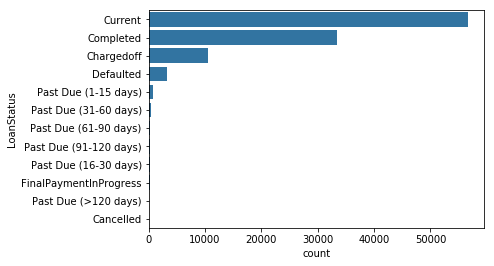

In [14]:
# A standard countplot
base_color= sb.color_palette()[0]
status_order= prosper['LoanStatus'].value_counts().index
status_bar= sb.countplot(data= prosper, y= 'LoanStatus', color=base_color, order=status_order)

status_bar;

The bar chart shows that there are more than 50 thousand current/open loans in our dataset.<br>
With completed loans being a little less than 40 thousand. The past due has only two delinquency buckets of no more than 2 months with effective value counts. The defaulted loans are about 5 thousand.<br>
The loan dataset has roughly 13 thousand chargedoff accounts which seems like little loss compared to the completed and current statuses.<br>

Next, is exploring the assumed 1st predictor of LoanStatus outcomes: LoanOriginalAmount

In [15]:
#overview of the assumed predictor feature
prosper.LoanOriginalAmount.describe()

count    106176.000000
mean       8568.842224
std        6265.592008
min        1000.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

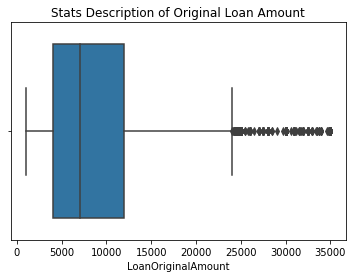

In [16]:
# simple boxplot of the Original Amount Loan feature
base_color= sb.color_palette()[0]
OriginalAmount_box = sb.boxplot(data=prosper, x= 'LoanOriginalAmount', color= base_color)
OriginalAmount_box.set_title('Stats Description of Original Loan Amount')

OriginalAmount_box;

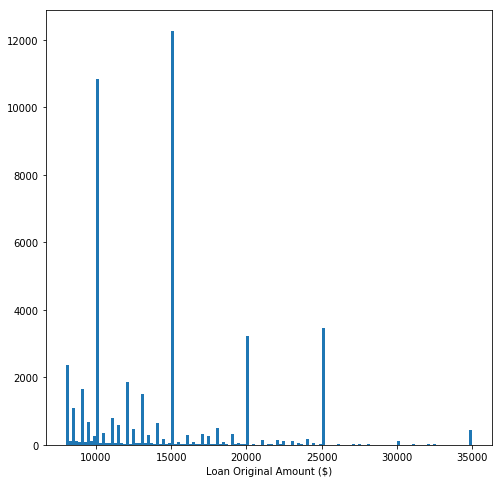

In [17]:
#Histogram of LoanOriginalAmount
bins= np.arange(8000, prosper['LoanOriginalAmount'].max()+200, 200)
plt.figure(figsize=[8,8])
plt.hist(data= prosper, x='LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Original Amount ($)')
plt.show();

The distribution is positively skewed with the lower quartile just below 5K and the upper quartile at about 12K the interquartile range is about 8K  with multiple outliers just over 25K. The maximum original loan amount is just below 25K.<br>
The average originally borrowed amount is about 8K.<br>
The second distribution shows peaks in frequency at 5K, 10K, 15K, 20K, 25K 30K, and 35K which means that frequent loans are multiples of 5K.<br>

Next, I will look at the Borrower rate:

In [18]:
#programmatic overview of the BorrowerRate feature
prosper.BorrowerRate.describe()

count    106176.000000
mean          0.193028
std           0.075209
min           0.000000
25%           0.133475
50%           0.184000
75%           0.251100
max           0.360000
Name: BorrowerRate, dtype: float64

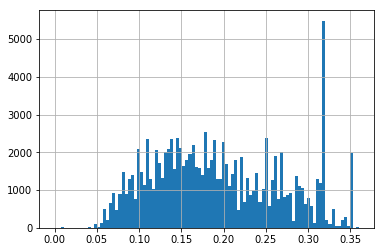

In [19]:
# A plot for the BorrowerRate feature
prosper['BorrowerRate'].hist(bins=100);


The Borrower's Rate Hisrogram has multimodal Plateau distribution with the highest frquency for the rates being more than 4K just above 30% . The average interest rate is about 20% from the programmatic stats.<br>

I will then look at the Term feature:

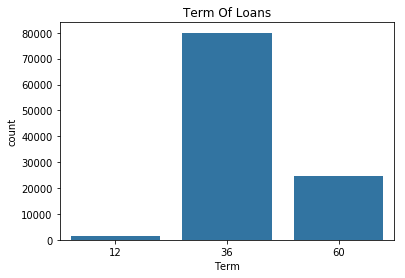

In [20]:
#A plot for the term of loans
base_color= sb.color_palette()[0]
T_bar= sb.countplot(data=prosper, x='Term', color=base_color)
T_bar.set_title('Term Of Loans')

T_bar;

The countplot for Loan Terms shows that most loans taken are for 3 years with 5 years being the second most favorable term. Not many clients take loans for a year.<br>

Next I will look at my first assumed predictor for the interest rate: Income Range

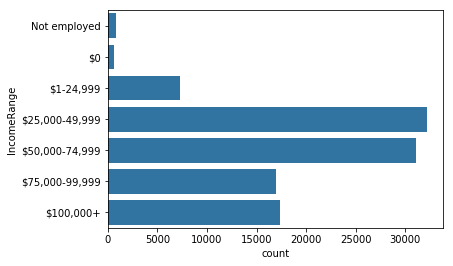

In [21]:
# A plot for the IncomeRange Distribution
base_color= sb.color_palette()[0]
IR_bar= sb.countplot(data= prosper, y= 'IncomeRange', color=base_color)

IR_bar;

Most of Prosper clientele's for this dataset income ranges between 25K & 50K US Dollars. <br> 

I will then explore the DebtToIncomeRatio feature:

In [22]:
# Programmatic description of the Debt To Income Ratio
prosper.DebtToIncomeRatio.describe()

count    97766.000000
mean         0.274304
std          0.509488
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

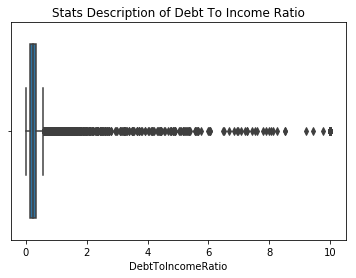

In [23]:
#A plot to show the debt to income ratio distribution
base_color= sb.color_palette()[0]
DTIR_box = sb.boxplot(data=prosper, x= 'DebtToIncomeRatio', color= base_color)
DTIR_box.set_title('Stats Description of Debt To Income Ratio')

DTIR_box;

The debt to income ratio has a small distribution meaning that the values are not scattered, with a few outliers around 10. <br>

Lastly I will look at DeliquenciesLast7years:


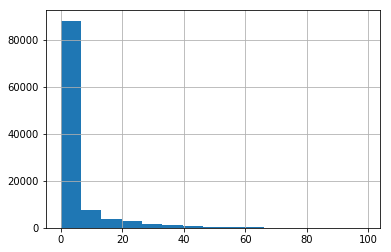

In [24]:
prosper['DelinquenciesLast7Years'].hist(bins=15);

The number of delinquencies in the past 7 years for Prosper clientele is frequently under 20.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My LoanOriginalAmount and DebtToIncomeRatio box plots had many outliers. No I didn't need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the BorrowerRate feature was multimodal meaning that our dataset may have contained multiple groups of sampled data. The distribution of the DelinquenciesLast7Years is highly right skewed with the highest frequency of more 80 thousands between 0 and 5 number of delinquencies. This means that Prosper properly tracks the credibility of the people before issuing loans as less than 10 thousands of their clients have delinquencies less than 20 for the past 7 years. <br>
There was no need to perform any changes

## Bivariate Exploration

> I will look at the pairwise relationship between the below stated features

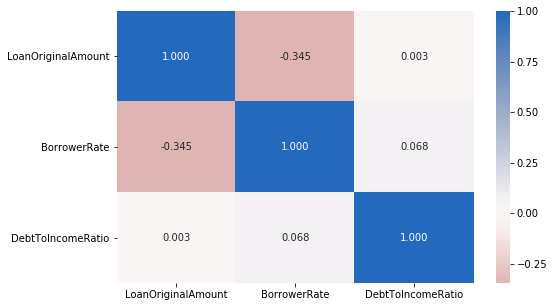

In [25]:
# group the categorial and numeric variables
cat_var= ['IncomeRange','LoanStatus', 'Term']
num_var= ['LoanOriginalAmount', 'BorrowerRate','DebtToIncomeRatio']

# correlation plot of numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(prosper[num_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

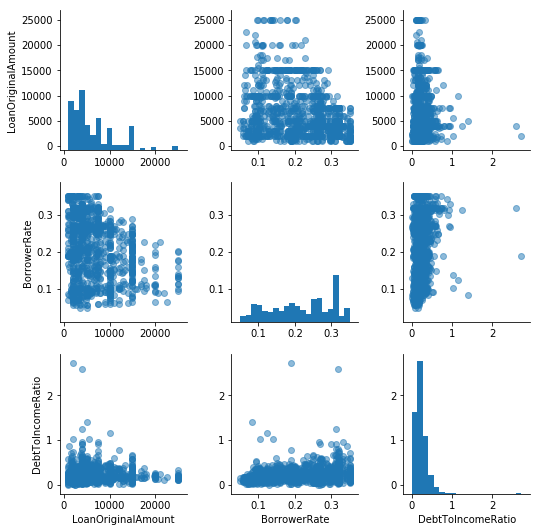

In [38]:
# group the categorial and numeric variables
cat_var= ['IncomeRange','LoanStatus', 'Term']
num_var= ['LoanOriginalAmount', 'BorrowerRate','DebtToIncomeRatio']

# Use a sample to render fast and clear plots
prosper_samp = prosper.sample(5000)

#pairwise matrix plot
plt.figure(figsize=[8,5])
g= sb.PairGrid(data=prosper_samp.dropna(), vars=num_var)
g= g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.5);
plt.show();

The correlation coefficient of LoanOriginalAmount And BorrowerRate is -0.345, the scatter plot of the two variables shows a weak negative correlation which means that when the principal amount is great then the interest rate will be low.<br>
The correlation coefficient between BorrowerRate and DebtToIncomeRatio is +0.068 which is a very weak positive relation. <br>
 
Next we will look at the relationship between the numerical and categorial variables: 

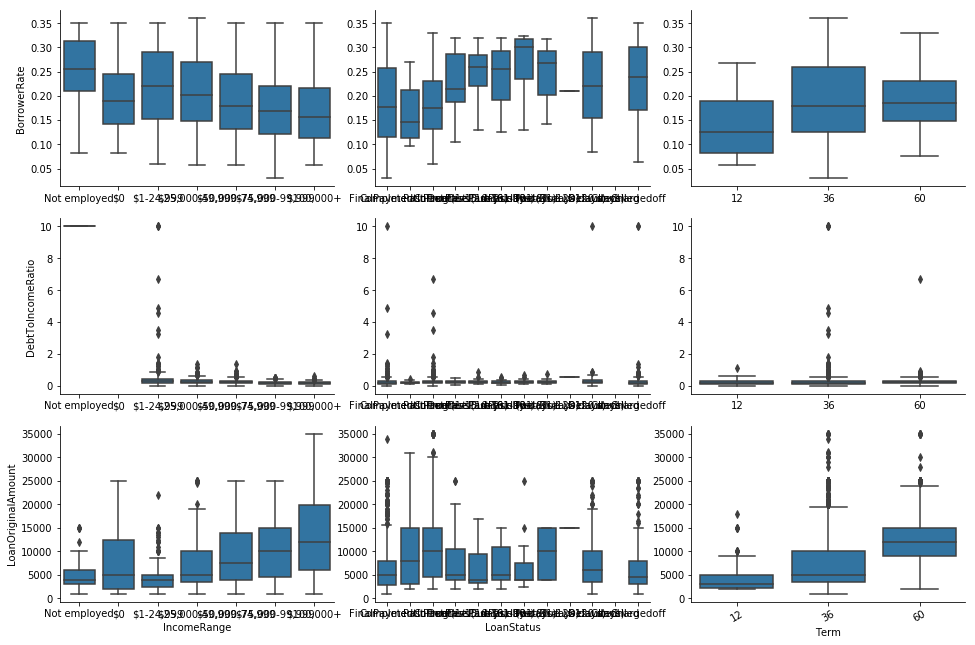

In [27]:
# Use a sample to render fast and clear plots
prosper_samp = prosper.sample(5000)

# Matrix Plot of the different variables
def boxgrid(x, y, **kwargs):
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = prosper_samp, y_vars = ['BorrowerRate', 'DebtToIncomeRatio', 'LoanOriginalAmount'], 
                x_vars = cat_var, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The figure shows that the LoanOriginalAmount increases with the increasing rank of the IncomeRange and also increases with the term of the loan, this makes sense since clients with higher incomes will take high amounts, and the longer the repayment term, the high the amount will be.<br>
It shows that the BorrowerRate slightly decreases with increasing rank of IncomeRange with the highest rates in range of 1 dollar to 25K dollars. This is what I expected, the higher the income range the less the interest rate on the loan will be.<br>

Next I will look at the relationship between the Categorial variables:

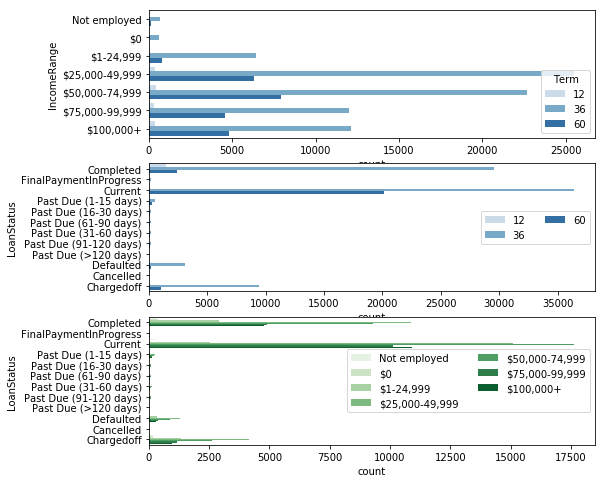

In [43]:
plt.figure(figsize = [8, 8])

# subplot 1: IncomeRange vs LoanStatus
plt.subplot(3, 1, 1)
sb.countplot(data = prosper, y = 'IncomeRange', hue = 'Term', palette = 'Blues')

# subplot 2: LoanStatus vs Term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = prosper, y = 'LoanStatus', hue = 'Term', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: IncomeRange vs Term, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = prosper, hue = 'IncomeRange', y = 'LoanStatus', palette = 'Greens')
ax.legend(ncol = 2) # re-arrange legend to remove overlapping

plt.show()

The Current LoanStatus has more than 25K accounts with 36 months terms and completed statuses are more than 20K with 36 months terms. The LoanStatus variable of PastDues has insufficient data to show its interaction with terms and IncomeRange.
The IncomeRange has more 36 months terms in all its ranges with the peak range being between 25,000 to 49,999 US Dollars.<br>
The IncomeRange vs LoanStatus plot shows that the Current Status has most of its clients earning between 50,000 to 74,999 US Dollars.

I will then look at the relationship between LoanStatus and BorrowerRate:

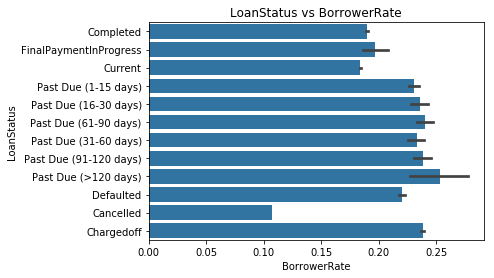

In [45]:
#A bivariate plot of LoanStatus and BorrowerRate
base_color= sb.color_palette()[0]
bar1=sb.barplot(data=prosper, y='LoanStatus', x='BorrowerRate', color=base_color)
bar1.set_title('LoanStatus vs BorrowerRate')

bar1;

The bar plot of the two variables shows that the completed loans had an interest rate lower than 20% and the Chargedoff loans had an interest rate higher than 20%. The trend is that the more past due days, the higher the interest rate.<br>

Next I will look at the relationship between LoanStatus and the LoanOriginalAmount:

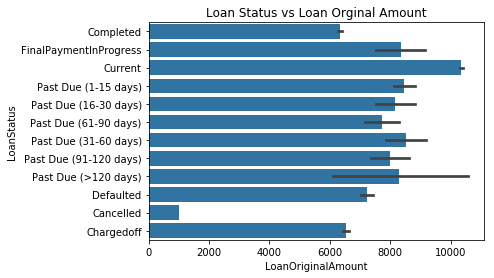

In [30]:
# A plot between LoanStatus and LoanOriginalAmount
base_color= sb.color_palette()[0]
bar2= sb.barplot(data=prosper, y='LoanStatus', x='LoanOriginalAmount', color=base_color)
bar2.set_title('Loan Status vs Loan Orginal Amount')

bar2;

The above plot shows that most current accounts have the principal amount above 10K US Dollars and cancelled accounts have less than 2K US Dollars.<br>

Next I will look at the relationship between the DebtToIncomeRatio and the BorrowerRate:

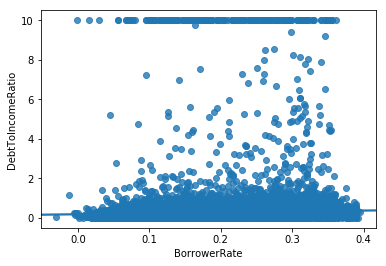

In [46]:
# A reg plot for BorrowerRate and DebtToIncomeRatio
base_color= sb.color_palette()[0]
reg1 = sb.regplot(data=prosper, y='DebtToIncomeRatio', x='BorrowerRate', fit_reg=True, x_jitter=0.04)

The scatter points seem like the interest rate increases as the debt to income ratio increases but regression plot shows that the two are not that significantly related as the reg line slope is almost zero.<br>

Lastly I will look at the relationship between the BorrowerRate and LoanOriginalAmount:

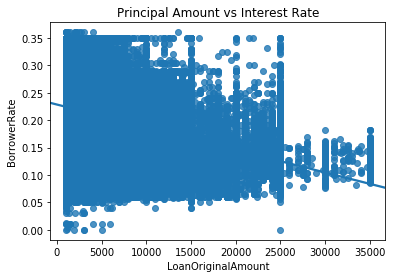

In [50]:
# A plot of Principal Amount vs Interest Rate
reg2 = sb.regplot(data=prosper, x='LoanOriginalAmount', y='BorrowerRate', fit_reg=True, x_jitter=0.04)
reg2.set_title('Principal Amount vs Interest Rate')

reg2;

The above plots show that the interest rate decreases with increasing principal loan amount. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When the BorrowerRate is above 20%, the LoanStatuses are mostly Past Dues with the highest rate being Past Due(>120 days). Most Current LoanStatuses have LoanOriginalAmounts higher than 10000 US Dollars. The BorrowerRate slightly decreases with increasing rank of IncomeRange with the highest rates in range of 1 dollar to 25K dollars. This is what I expected, the higher the income range the less the interest rate on the loan will be. The BorrowerRate has a weak positive relation with the DebtToIncomeRatio I expected a higher rate with a higher ratio, A positive correlation.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The BorrowerRate decreases with increasing LoanOriginalAmount. Which makes sense as more money borrowed will lead to a less interest rate in the loan. The LoanOriginalAmount increases with increasing loan Terms, the longer the repayment term the more money borrowed. The LoanOriginalAmount is also related to the IncomeRange with higher ranges borrowing more amounts.

## Multivariate Exploration

> The main thing I wanna look at in this part of the analysis is the impact of the three categorial variables on the relationship between the BorrowerRate and LoanOriginalAmount

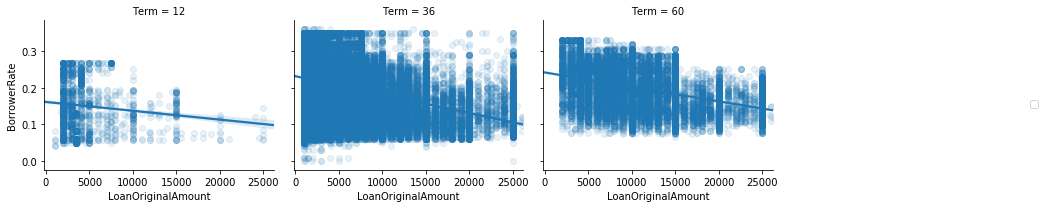

In [62]:
# Term impact on the BorrowerRate vs LoanOriginalAmount
g=sb.FacetGrid(data=prosper, aspect=1.2, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

The Term feature has no effect on the relationship between the two numerical variables. The BorrowerRate decreases with increasing LoanOriginalAmount whatever the term on the loan may be.

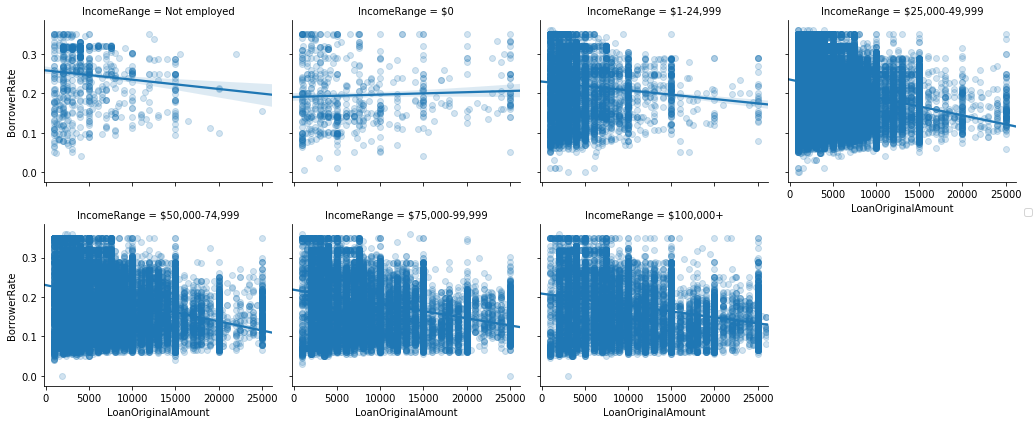

In [64]:
# IncomeRange impact on the BorrowerRate vs LoanOriginalAmount
g=sb.FacetGrid(data=prosper, aspect=1.2, col='IncomeRange', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.2});
g.add_legend();

There is a slight change between the relationship between the BorrowerRate and the LoanOriginalAmount in the Not employed, 0 Dollars and the 1 to 24,999 US Dollars ranges. But the overall the IncomeRange has no impact on the relationship between the two variables

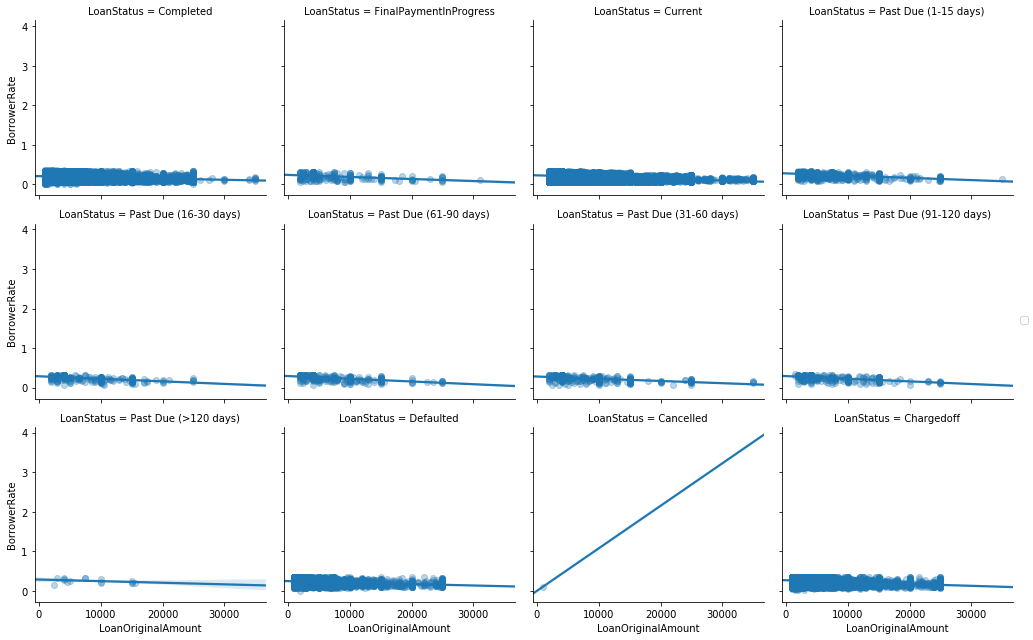

In [65]:
# LoanStatus impact on the BorrowerRate vs LoanOriginalAmount
g=sb.FacetGrid(data=prosper, aspect=1.2, col='LoanStatus', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.3});
g.add_legend();

The isn't enough data on cancelled LoanStatus data relating BorrowerRate and LoanOriginalAmount that the legend seems to have a steep positive slope. But overall the LoanStatus has no effect in the relationship between the two.

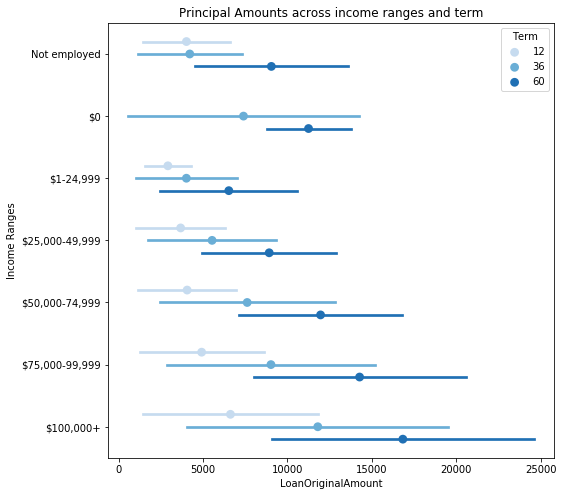

In [66]:
# The effect of loan terms on the relationship between the IncomeRange and LoanOriginalAmount
fig = plt.figure(figsize = [8,8])
ax = sb.pointplot(data = prosper, x = 'LoanOriginalAmount', y = 'IncomeRange', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Principal Amounts across income ranges and term')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Income Ranges')
ax.set_yticklabels([],minor = True);

The Loan Amount Increases with Increasing income ranges and loan terms. People with higher incomes borrow more money and especially if there is a long term to pay the money.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a slight change between the relationship between the BorrowerRate and the LoanOriginalAmount in the Not employed, 0 Dollars and the 1 to 24,999 US Dollars ranges. The Loan amount amplitude increases with higher income ranges and increasing repayment terms.

### Were there any interesting or surprising interactions between features?

> The 60 months term for the Not employed range has a LoanOriginalAmount amplitude that is close to the 50,000 to 74,999 US Dollars range for the same term. And the 0 US Dollar range has nearly the same LoanOriginalAmount amplitude as the +100,000 US Dollars income range for the 36 months term. These anomalies may be because Unemployed with no income need loans more and they are more likely to take loans with longer repayment periods.

## Conclusions

In the wrangling part, I dropped a few columns and data points because of missing values and ordered ordinal categorial features. Initially on my analysis, I was interested on investigating what features have an effect on the outcome status of a loan, and what features impact the interest rate of the borrower. In the Univariate part, I found that the distribution of the BorrowerRate feature was multimodial. In the Bivariate part, I discovered that when the BorrowerRate is above 20%, the LoanStatuses are mostly Past Dues. The BorrowerRate slightly decreases with increasing rank of IncomeRange. This is what I expected, the higher the income range the less the interest rate on the loan will be. The BorrowerRate has a weak positive correlation with the DebtToIncomeRatio and I expected a higher rate with a higher ratio, A strong positive correlation. Outside my main features of interest, I found that the BorrowerRate decreases with increasing LoanOriginalAmount. The LoanOriginalAmount increases with increasing loan Terms. The LoanOriginalAmount is also positively related to the IncomeRange with higher ranges borrowing more amounts.
And Lastly in the multivariate part, I discovered that the Loan amount amplitude increases with higher income ranges and increasing repayment terms.
